# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer



Berikut adalah deskripsi pustaka (library) yang digunakan dalam kode:  

- **pandas (`import pandas as pd`)** → Untuk manipulasi dan analisis data dalam bentuk DataFrame.  
- **numpy (`import numpy as np`)** → Untuk komputasi numerik, terutama operasi matriks dan array.  
- **scikit-learn - PCA (`from sklearn.decomposition import PCA`)** → Untuk reduksi dimensi dengan Principal Component Analysis (PCA).  
- **seaborn (`import seaborn as sns`)** → Untuk visualisasi data statistik dengan tampilan yang menarik.  
- **matplotlib (`import matplotlib.pyplot as plt`)** → Untuk membuat grafik seperti scatter plot, line chart, dan histogram.  
- **yellowbrick**  
  - `KElbowVisualizer` → Untuk menentukan jumlah klaster optimal dalam K-Means.  
  - `SilhouetteVisualizer` → Untuk menilai kualitas clustering dengan metode silhouette.  
- **scikit-learn - Clustering**  
  - `KMeans` → Algoritma clustering berbasis centroid.  
  - `AgglomerativeClustering` → Algoritma clustering berbasis hirarki.  
- **scikit-learn - Preprocessing**  
  - `StandardScaler` → Untuk standarisasi data dengan mean 0 dan varians 1.  
  - `OneHotEncoder` → Untuk mengubah data kategorikal menjadi bentuk numerik biner.  
- **scikit-learn - Metrics (`from sklearn.metrics import silhouette_score`)** → Untuk mengevaluasi kualitas clustering menggunakan Silhouette Score.  


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [92]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_table('/content/drive/MyDrive/Submission Akhir BMLP/marketing_campaign.csv')
df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0




Dataset ini kemungkinan berisi data kampanye pemasaran yang digunakan untuk analisis perilaku pelanggan dan efektivitas strategi pemasaran.  

#### **Kemungkinan Fitur dalam Dataset:**  
- **ID Pelanggan** → Identitas unik setiap pelanggan.  
- **Usia atau Tahun Kelahiran** → Informasi demografi pelanggan.  
- **Pendapatan** → Pendapatan tahunan pelanggan.  
- **Status Pernikahan** → Menunjukkan apakah pelanggan menikah, lajang, atau lainnya.  
- **Jumlah Anak** → Menampilkan jumlah anak dalam rumah tangga pelanggan.  
- **Jumlah Pembelian** → Mencatat transaksi pembelian yang dilakukan pelanggan.  
- **Jenis Produk yang Dibeli** → Informasi kategori produk yang dibeli.  
- **Metode Pemasaran yang Digunakan** → Misalnya kampanye email, media sosial, atau iklan lainnya.  
- **Respon terhadap Kampanye** → Apakah pelanggan merespons positif terhadap kampanye pemasaran (misalnya, melakukan pembelian setelah menerima promosi).  

Dataset ini kemungkinan digunakan untuk **analisis segmentasi pelanggan**, **prediksi respons terhadap kampanye pemasaran**, dan **strategi optimasi pemasaran** menggunakan teknik analisis data dan machine learning.  



# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [93]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [94]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [95]:
# Menampilkan jumlah kolom dalam dataset
print("Total jumlah kolom dalam dataset:", len(df.columns))

# Menampilkan nama-nama kolom yang ada dalam dataset
print("Daftar nama kolom dalam dataset:")
for col in df.columns:
    print("-", col)


Total jumlah kolom dalam dataset: 29
Daftar nama kolom dalam dataset:
- ID
- Year_Birth
- Education
- Marital_Status
- Income
- Kidhome
- Teenhome
- Dt_Customer
- Recency
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds
- NumDealsPurchases
- NumWebPurchases
- NumCatalogPurchases
- NumStorePurchases
- NumWebVisitsMonth
- AcceptedCmp3
- AcceptedCmp4
- AcceptedCmp5
- AcceptedCmp1
- AcceptedCmp2
- Complain
- Z_CostContact
- Z_Revenue
- Response


In [96]:
# Menampilkan jumlah data yang hilang di setiap kolom dengan format yang lebih rapi
missing_data = df.isna().sum()
print("Jumlah data yang hilang di setiap kolom:\n")
print(missing_data[missing_data > 0])


Jumlah data yang hilang di setiap kolom:

Income    24
dtype: int64


In [97]:
# Mengisi nilai yang hilang di kolom 'Income' dengan nilai median sebagai alternatif mean
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)

# Menampilkan kembali jumlah data yang hilang setelah pengisian
print("Jumlah data yang hilang setelah pengisian:\n", df.isna().sum())


Jumlah data yang hilang setelah pengisian:
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


<ipython-input-97-5c4865358d0d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(median_income, inplace=True)


In [98]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


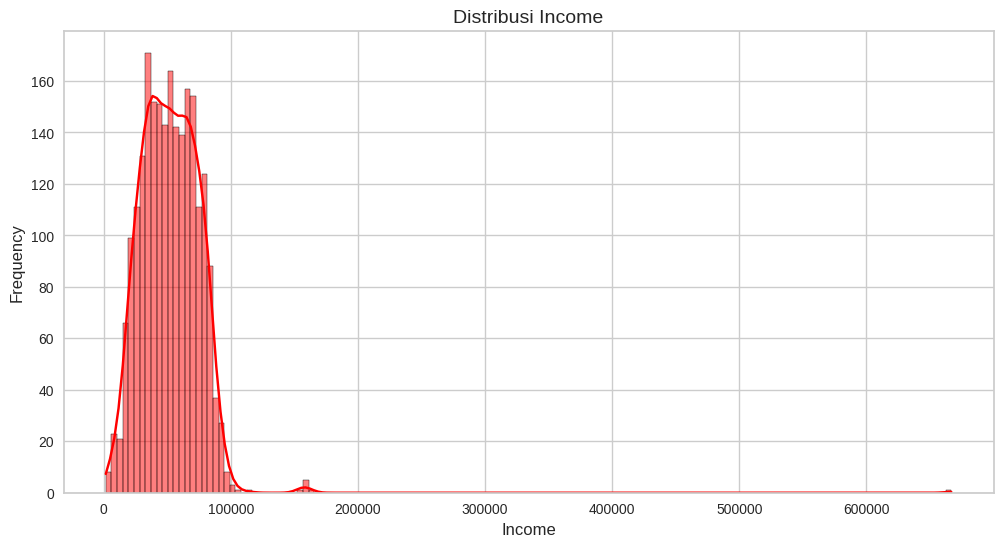

In [99]:


# Visualisasi distribusi menggunakan histogram dengan warna merah dan jumlah bins yang sesuai
plt.figure(figsize=(12, 6))
sns.histplot(df['Income'], bins=150, kde=True, color='red')  # Menggunakan bins=50 agar mirip dengan gambar
plt.title('Distribusi Income', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)  # Menambahkan grid agar lebih mudah dibaca
plt.show()


**Apa yang bisa kita amati dari grafik ini?**

- Mayoritas individu memiliki penghasilan di bawah 100.000. Hal ini terlihat dari tinggi batang grafik yang mendominasi di area tersebut, menandakan bahwa sebagian besar orang berada dalam rentang pendapatan ini.  
- Ketika pendapatan meningkat, jumlah individu yang memilikinya justru menurun. Hal ini tercermin dari grafik yang semakin menurun ke arah kanan, menunjukkan bahwa hanya sedikit orang dengan penghasilan tinggi.  
- Distribusi penghasilan dalam data ini tidak seimbang. Grafik menunjukkan kemiringan ke kanan (right-skewed), yang mengindikasikan adanya sejumlah kecil orang dengan pendapatan yang jauh lebih tinggi dibanding mayoritas lainnya.


**Apa makna dari grafik ini?**  
Grafik ini mengilustrasikan bahwa sebagian besar populasi memiliki penghasilan yang tergolong rendah, sedangkan hanya segelintir orang yang memperoleh pendapatan sangat tinggi. Pola seperti ini umum ditemukan di banyak negara dan mencerminkan adanya ketimpangan distribusi pendapatan antara kelompok masyarakat berpenghasilan rendah dan tinggi.

**Bagaimana informasi ini bisa dimanfaatkan?**  

- **Perumusan kebijakan publik:** Pemerintah dapat memanfaatkan data ini untuk menyusun kebijakan yang bertujuan mengurangi ketimpangan ekonomi, serta meningkatkan kesejahteraan masyarakat berpenghasilan rendah.  
- **Perencanaan bisnis:** Perusahaan dapat menggunakan informasi ini untuk mengidentifikasi segmen pasar yang sesuai dengan produk atau layanan mereka. Jika menargetkan konsumen dengan pendapatan tinggi, strategi pemasaran bisa difokuskan pada kelompok tertentu dengan daya beli yang lebih besar.  
- **Kajian lanjutan:** Data ini juga dapat menjadi dasar untuk penelitian lanjutan, seperti mengeksplorasi penyebab ketimpangan pendapatan atau mengidentifikasi faktor-faktor yang memengaruhi distribusinya.



<ipython-input-100-8c9e0048b773>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Income', x='Education', data=df, palette='coolwarm')


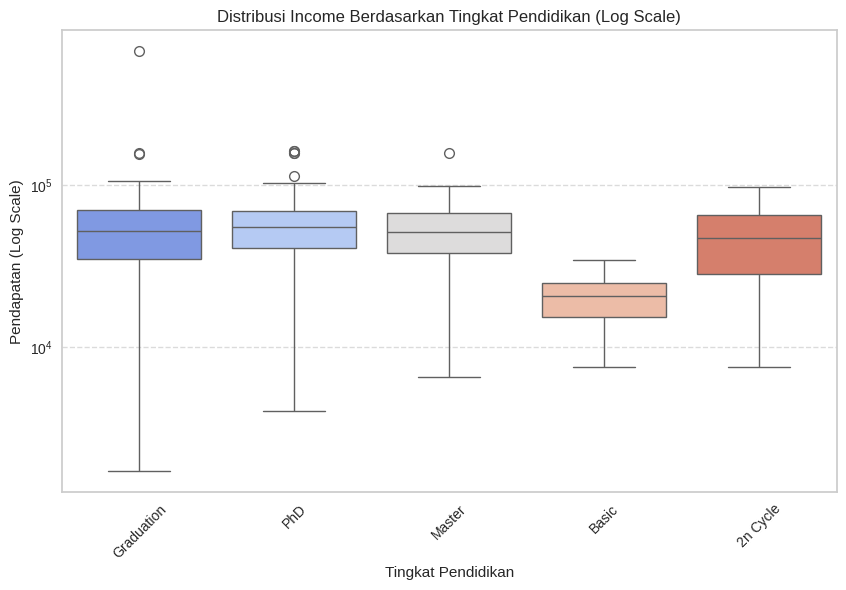

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Income', x='Education', data=df, palette='coolwarm')
plt.yscale('log')  # Menggunakan skala logaritmik
plt.title('Distribusi Income Berdasarkan Tingkat Pendidikan (Log Scale)')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Pendapatan (Log Scale)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




Mari kita analisis bersama isi dari grafik box plot ini, yang menggambarkan kaitan antara **tingkat pendidikan** dengan **besarnya pendapatan**.

**Apa informasi yang bisa kita tarik dari grafik ini?**

- **Pendapatan Median:** Garis horizontal di dalam setiap kotak menandakan nilai tengah (median) pendapatan dari masing-masing jenjang pendidikan. Jika posisi garis ini lebih tinggi, artinya kelompok tersebut cenderung memiliki pendapatan lebih besar.  
- **Rentang Interkuartil (IQR):** Ukuran kotak menunjukkan seberapa besar variasi pendapatan dalam kelompok tersebut—semakin panjang kotaknya, semakin beragam nilai pendapatannya.  
- **Kuartil Pertama dan Ketiga:** Bagian bawah dan atas kotak masing-masing mewakili nilai kuartil ke-1 (25%) dan ke-3 (75%). Artinya, setengah dari data pendapatan di tiap kelompok berada dalam rentang ini.  
- **Garis "Kumis":** Garis yang menjulur dari kotak ke atas dan bawah menggambarkan sebaran data yang masih dalam batas normal.  
- **Nilai Ekstrem (Outlier):** Titik-titik yang berada di luar jangkauan kumis mengindikasikan data yang jauh berbeda dari mayoritas, baik jauh lebih tinggi maupun lebih rendah dari pendapatan kebanyakan orang dalam kelompok tersebut.

Secara keseluruhan, grafik ini memperlihatkan adanya **kecenderungan positif** antara jenjang pendidikan dengan besarnya pendapatan. Artinya, orang dengan tingkat pendidikan yang lebih tinggi umumnya memiliki penghasilan yang lebih besar.

- **PhD dan Master:** Kedua kelompok ini memiliki posisi median pendapatan tertinggi, yang menunjukkan bahwa gelar pascasarjana memberikan nilai tambah signifikan dalam hal penghasilan.  
- **Graduation (S1):** Lulusan strata satu menunjukkan pendapatan yang cukup menjanjikan, meskipun terdapat perbedaan pendapatan yang cukup besar antar individu dalam kelompok ini.  
- **Basic dan 2nd Cycle:** Kelompok dengan pendidikan dasar dan menengah cenderung memiliki pendapatan lebih rendah dibandingkan jenjang pendidikan yang lebih tinggi, menandakan bahwa jenjang pendidikan ini belum cukup kuat untuk menjamin penghasilan yang besar.

Namun demikian, ada beberapa hal penting yang juga perlu dipertimbangkan:

- **Outlier:** Munculnya nilai-nilai yang menyimpang (outlier) menandakan bahwa selain pendidikan, terdapat faktor lain yang turut memengaruhi pendapatan seseorang, seperti pengalaman kerja, bidang pekerjaan, atau kondisi ekonomi.  
- **Tidak Mutlak:** Grafik ini menyajikan kecenderungan umum, bukan aturan pasti. Artinya, tidak semua orang dengan pendidikan tinggi akan memiliki pendapatan tinggi, dan sebaliknya, orang dengan pendidikan lebih rendah belum tentu berpenghasilan kecil.



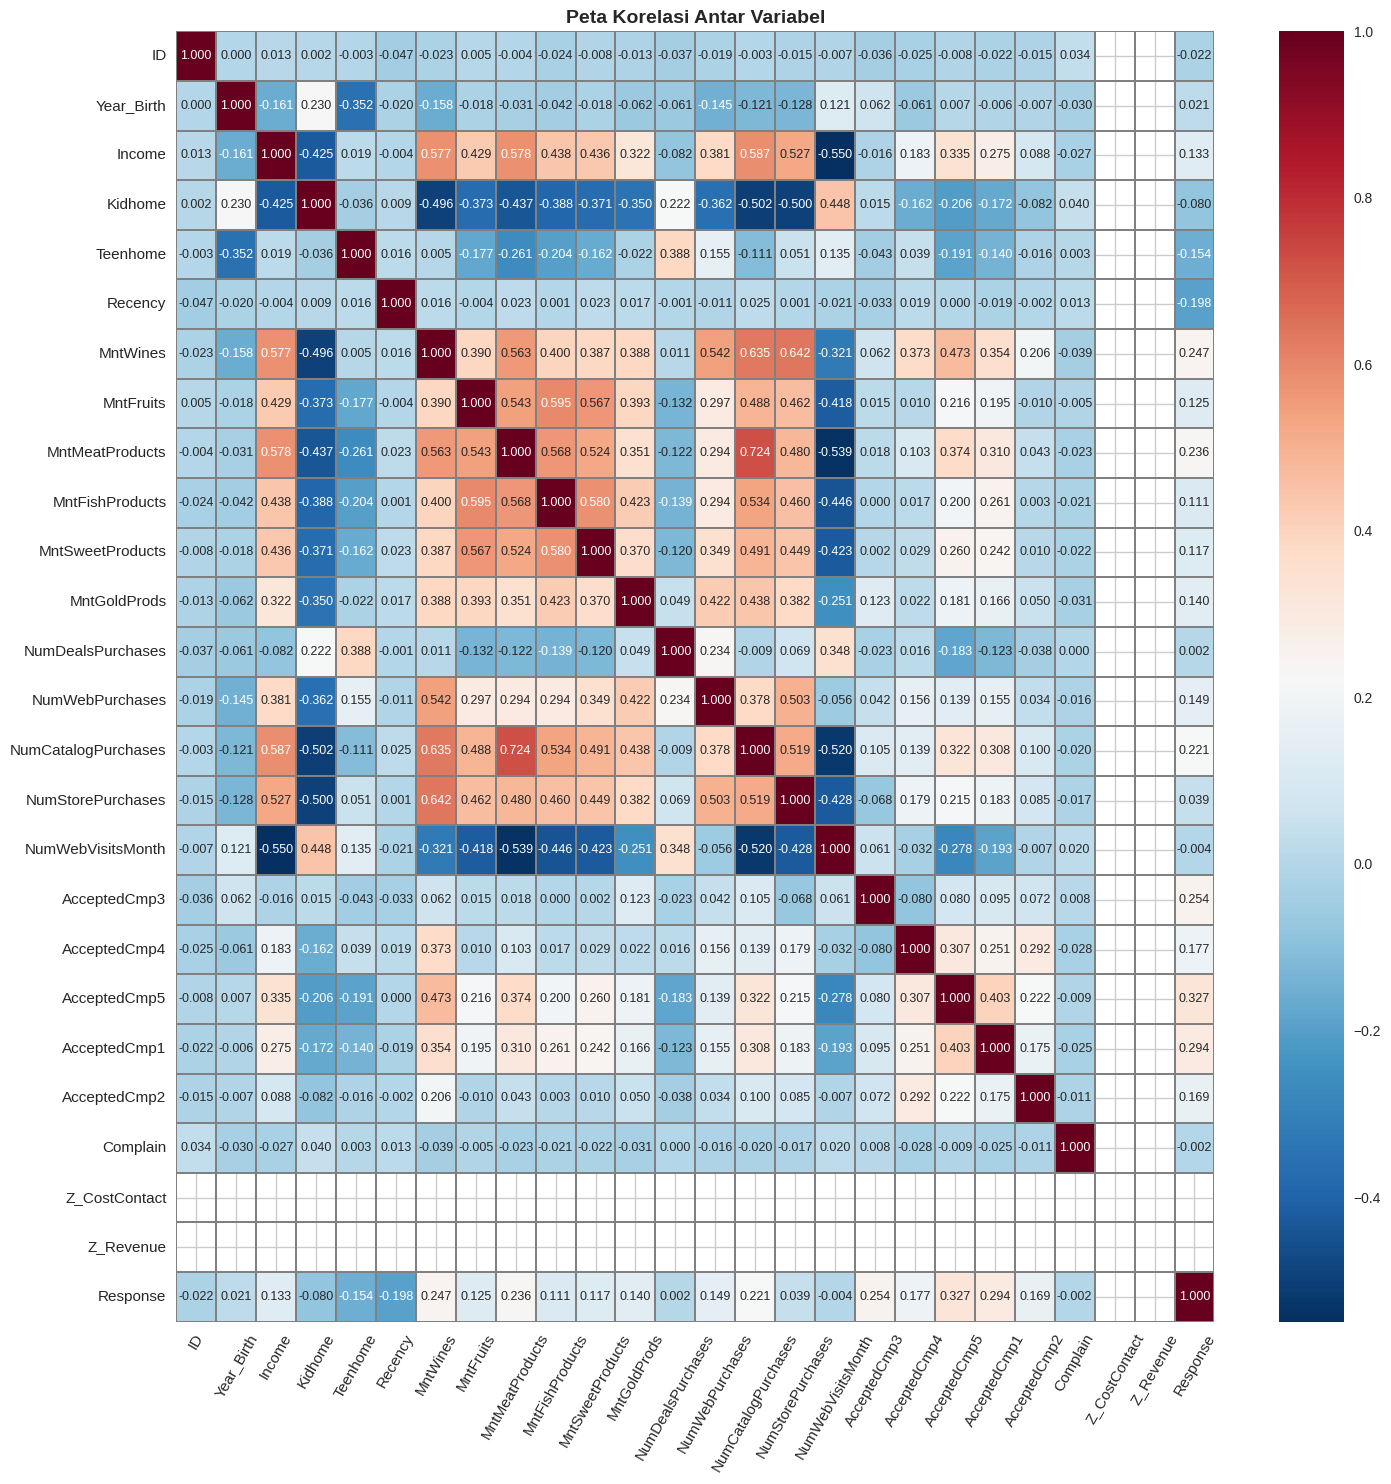

In [101]:


# Menghitung matriks korelasi
correlation_matrix = df.corr(numeric_only=True)  # Sesuaikan agar hanya numerik

# Membuat Heatmap dengan sedikit perubahan gaya
plt.figure(figsize=(15, 15))  # Ukuran figure yang berbeda
sns.heatmap(
    correlation_matrix,
    annot=True,           # Menampilkan nilai korelasi
    fmt=".3f",            # Menampilkan 3 angka desimal
    cmap="RdBu_r",        # Warna heatmap berbeda
    linewidths=0.3,       # Lebar garis pemisah antar sel
    linecolor="gray",     # Warna garis pemisah
    annot_kws={"size": 9} # Ukuran font angka dalam heatmap
)

# Tambahkan judul dan sesuaikan elemen visual lainnya
plt.title("Peta Korelasi Antar Variabel", fontsize=14, fontweight="bold")
plt.xticks(rotation=60, fontsize=11)  # Memutar label sumbu X agar lebih terbaca
plt.yticks(fontsize=11)  # Atur ukuran label sumbu Y

plt.tight_layout()  # Menghindari pemotongan grafik
plt.show()


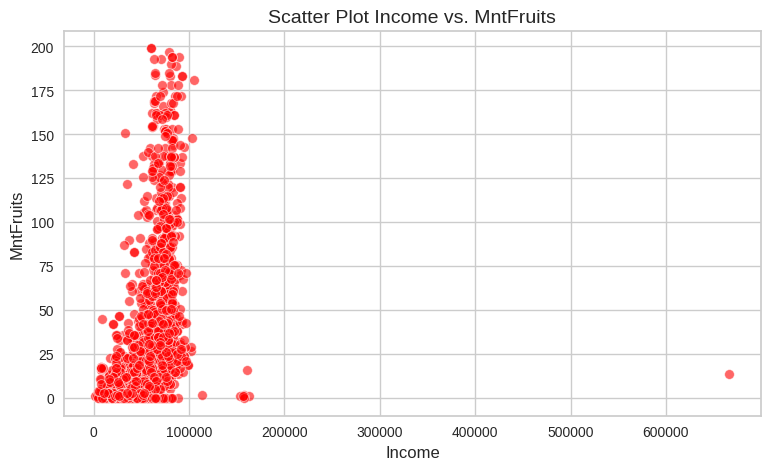

In [102]:
plt.figure(figsize=(9, 5))  # Ubah ukuran figure
sns.scatterplot(x='Income', y='MntFruits', data=df, color='red', alpha=0.6)  # Ganti kolom dan ubah warna serta transparansi
plt.title('Scatter Plot Income vs. MntFruits', fontsize=14)  # Ubah ukuran judul
plt.xlabel('Income', fontsize=12)  # Ubah ukuran label x
plt.ylabel('MntFruits', fontsize=12)  # Ubah ukuran label y
plt.grid(True)  # Tambahkan grid
plt.show()


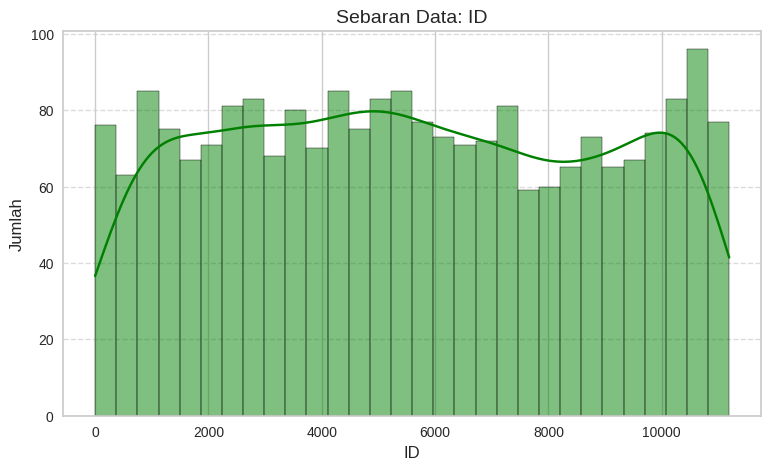

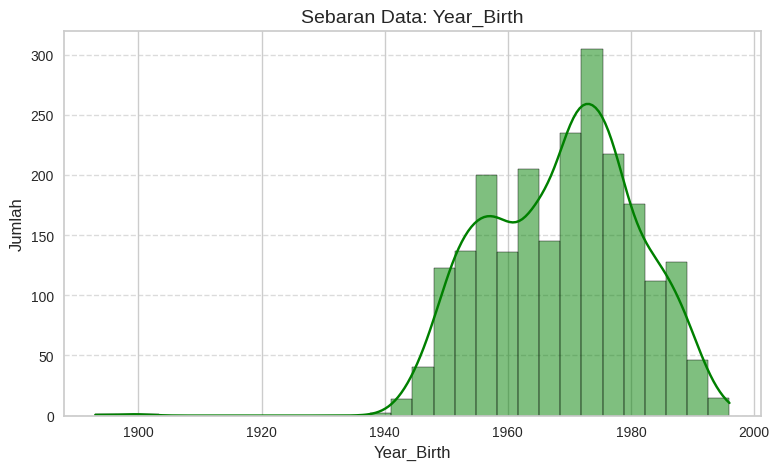

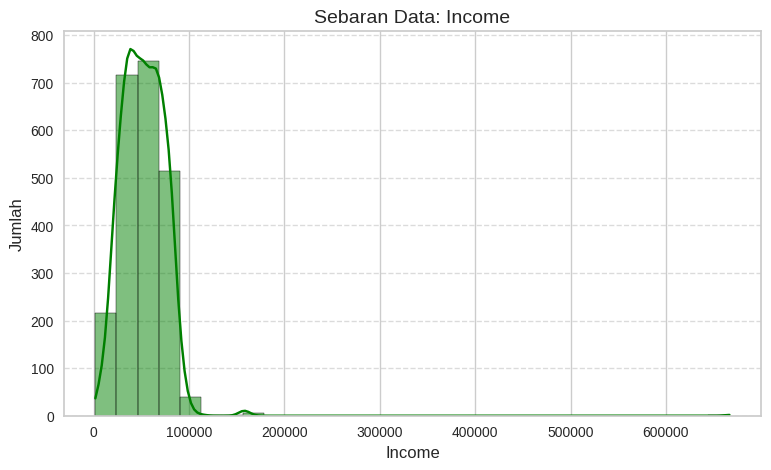

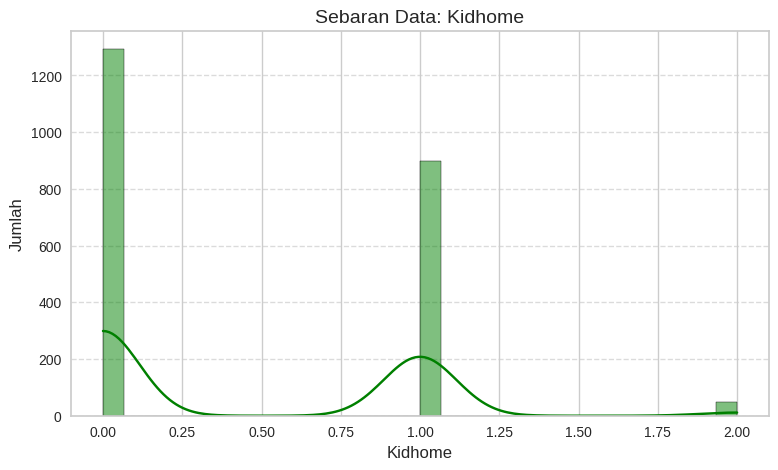

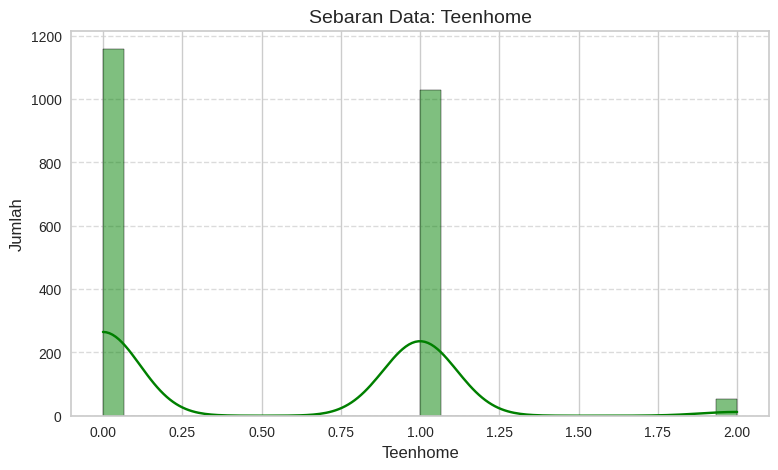

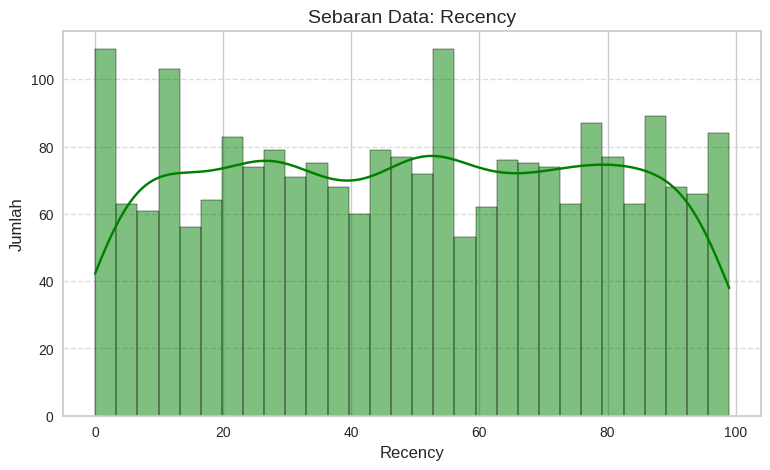

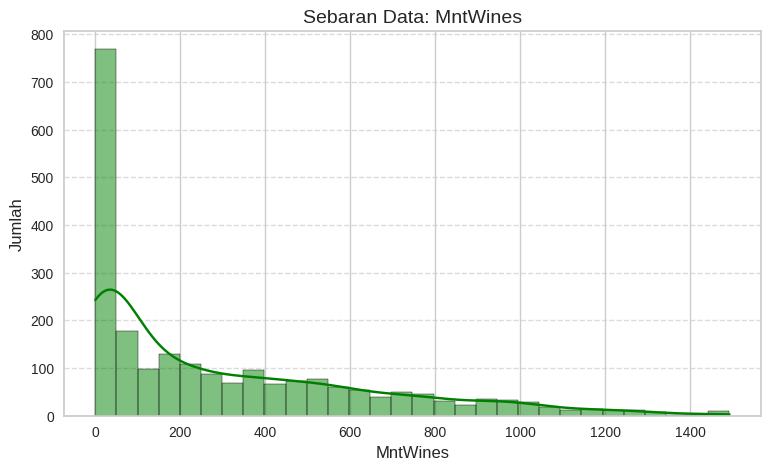

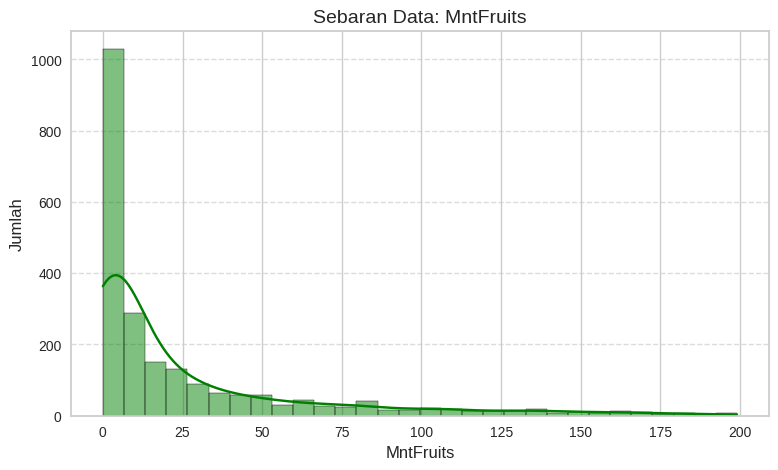

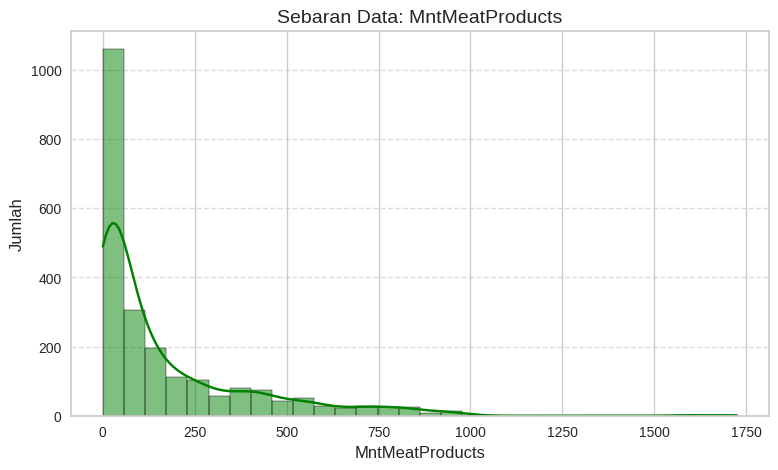

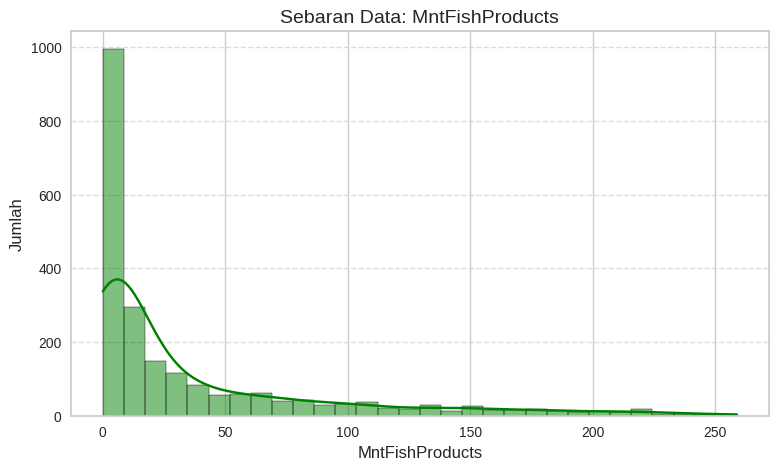

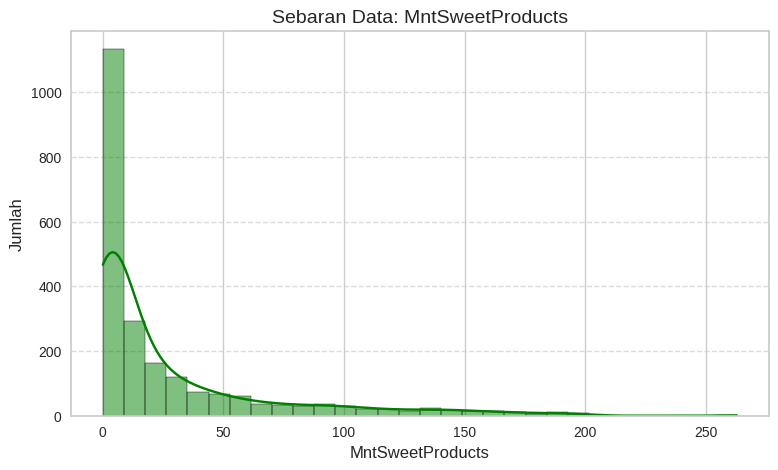

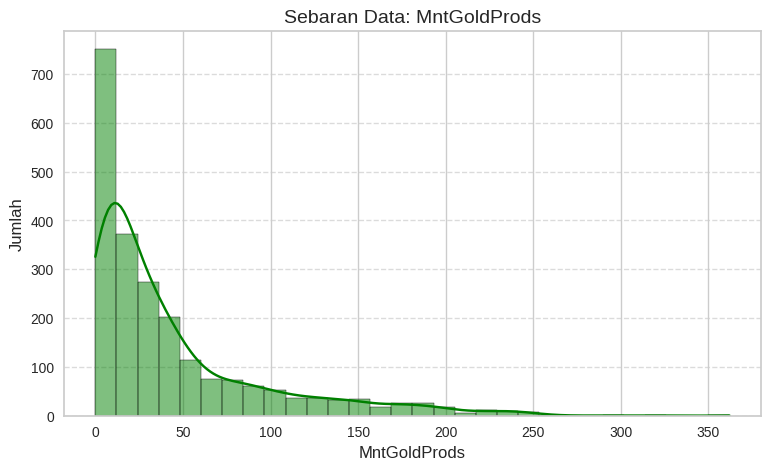

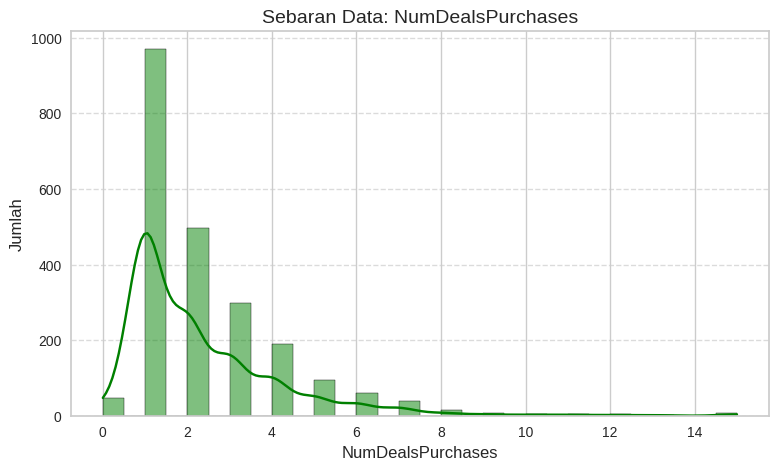

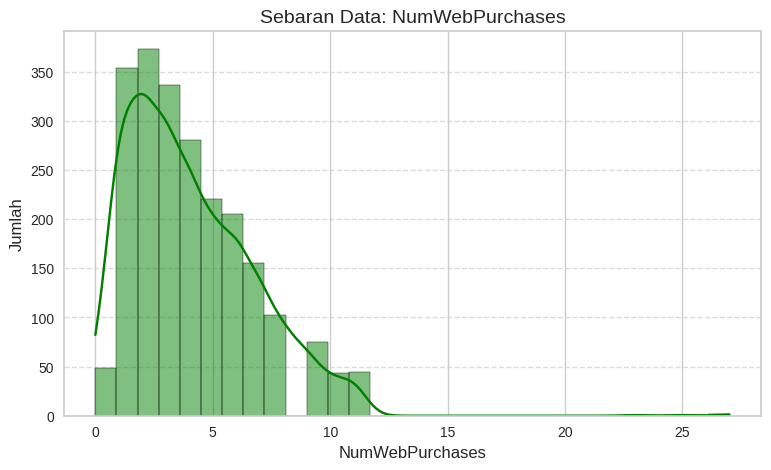

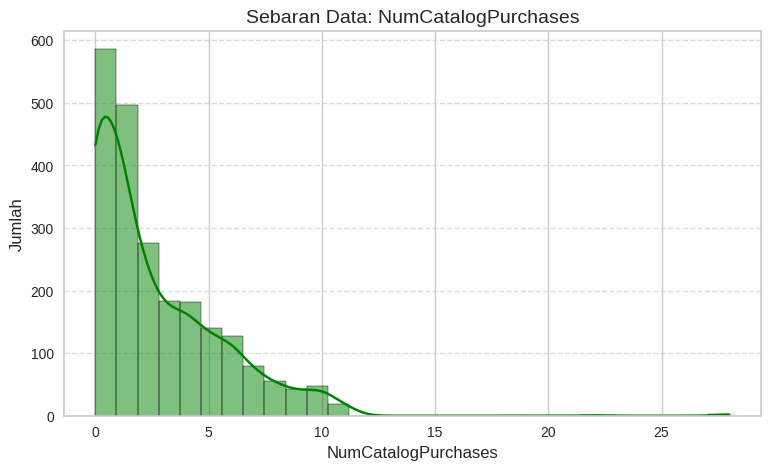

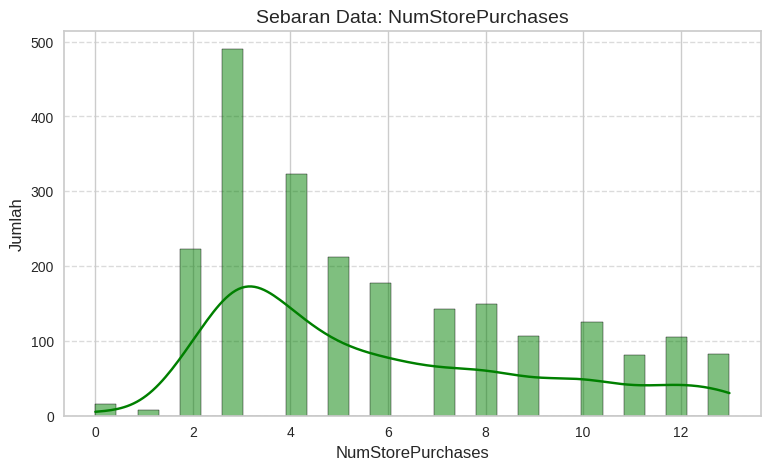

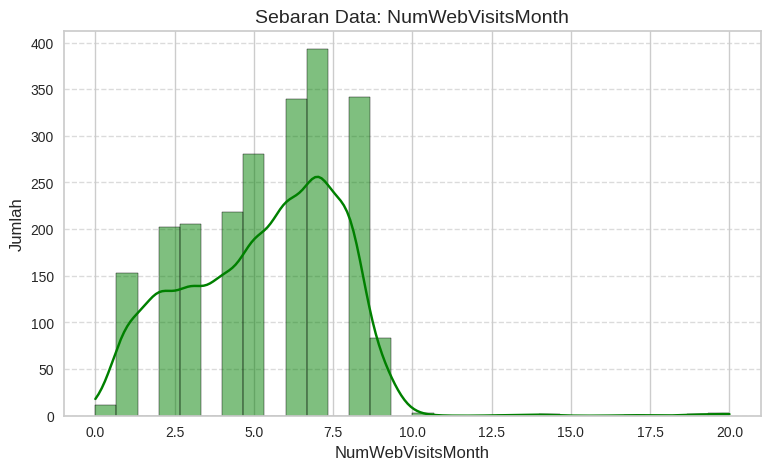

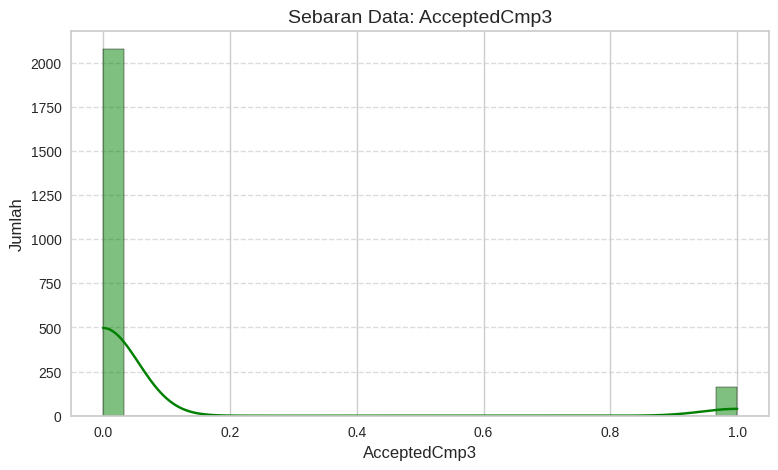

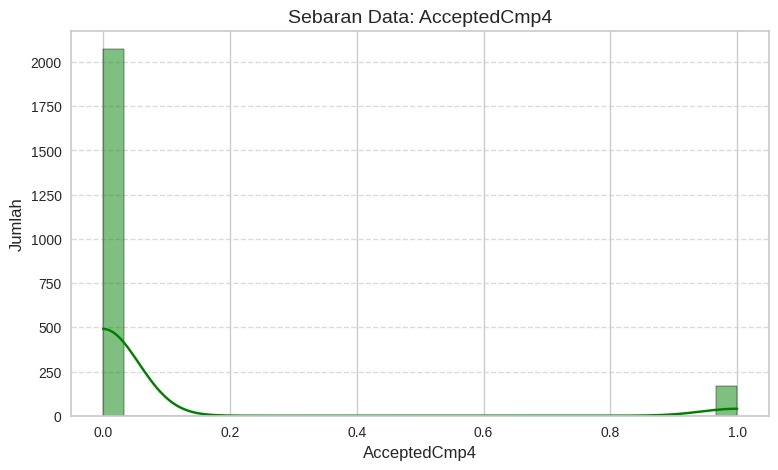

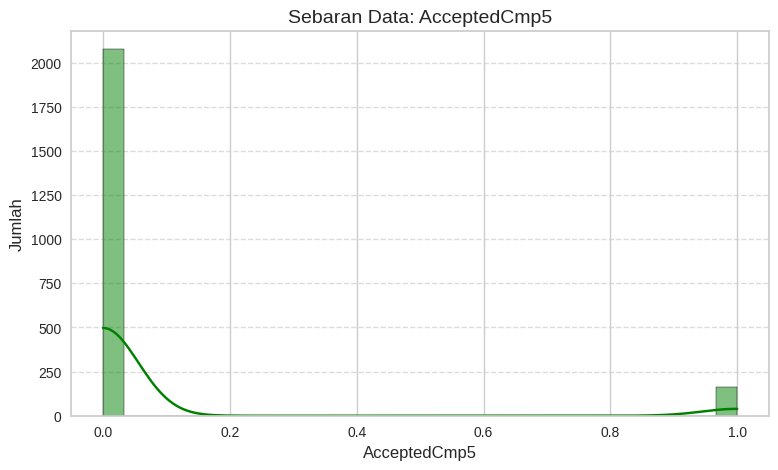

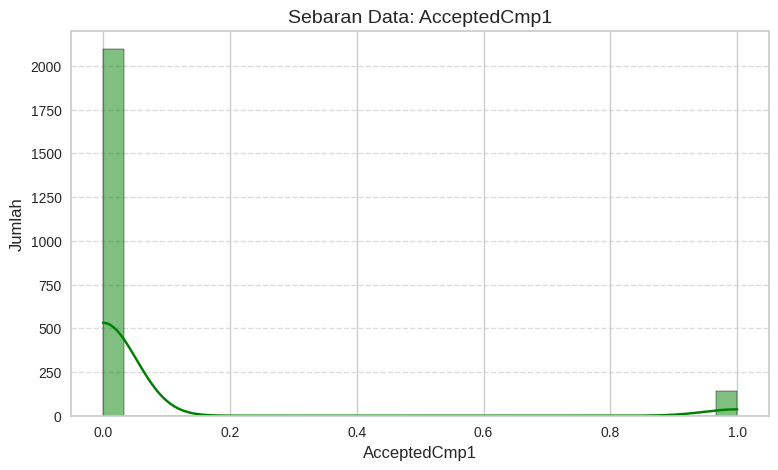

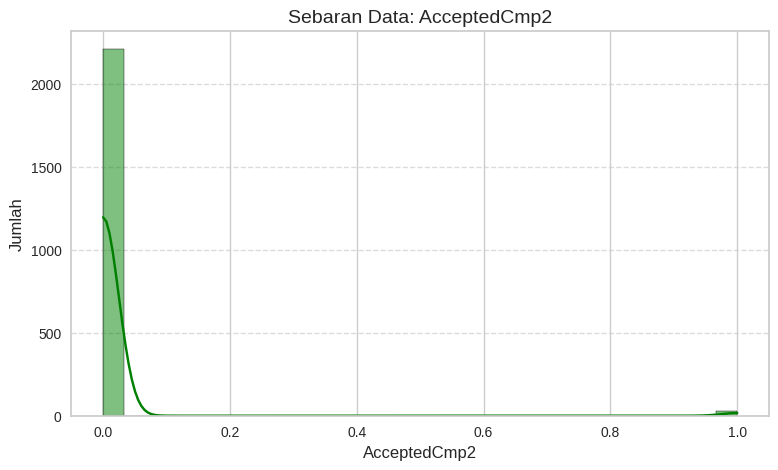

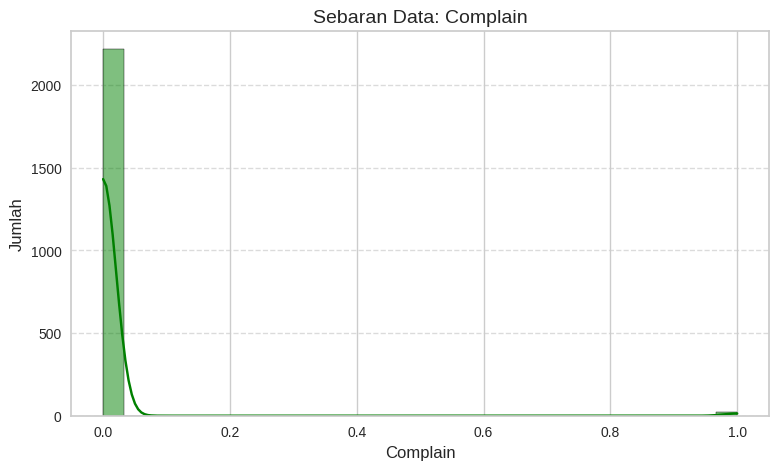

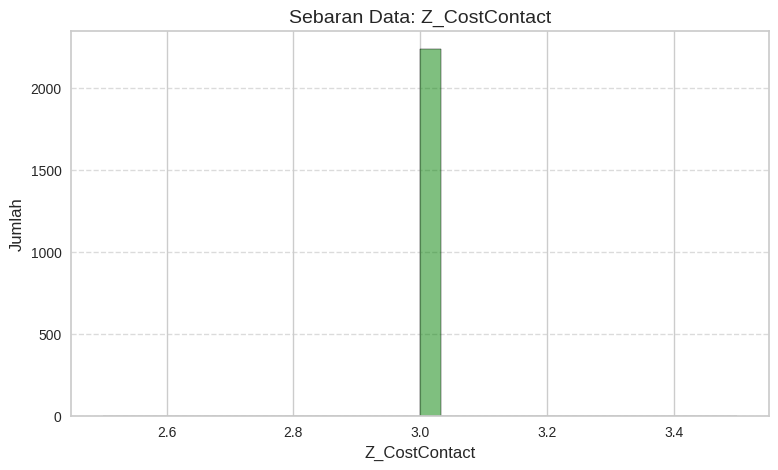

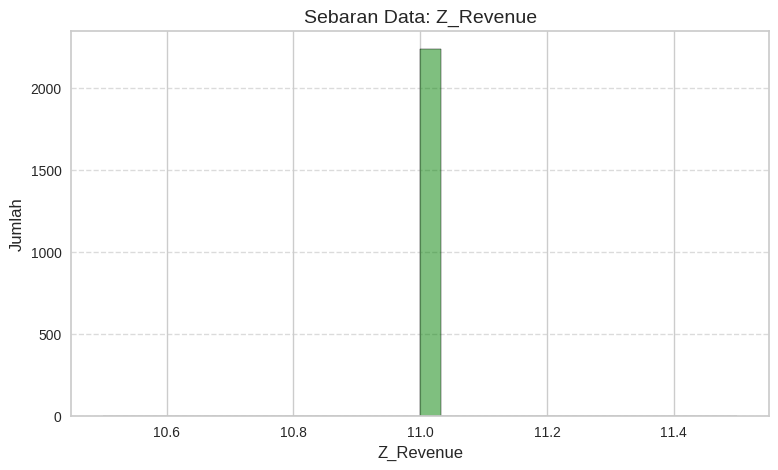

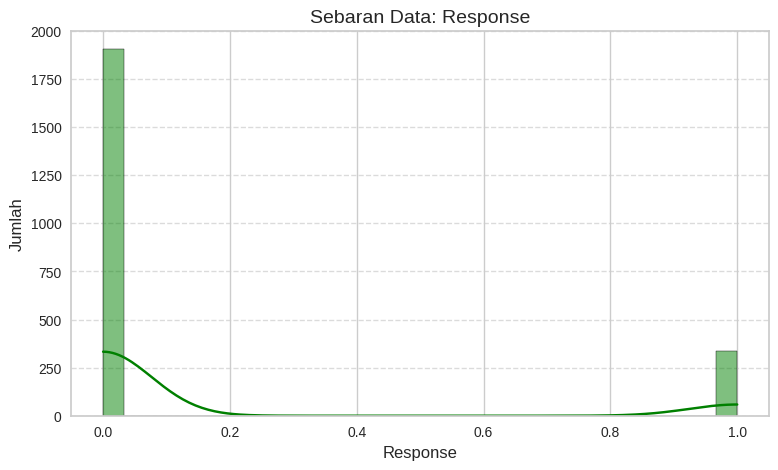

In [103]:
# Visualisasi Distribusi untuk Variabel Numerik
num_columns = df.select_dtypes(include=['number']).columns  # Pilih kolom numerik

def plot_distribution(data, columns):
    """ Fungsi untuk menampilkan histogram setiap variabel numerik """
    for col in columns:
        plt.figure(figsize=(9, 5))  # Sesuaikan ukuran plot
        sns.histplot(data[col], bins=30, kde=True, color='green')  # Ubah jumlah bins dan warna
        plt.title(f'Sebaran Data: {col}', fontsize=14)  # Ubah format judul
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Jumlah', fontsize=12)  # Ubah label sumbu y
        plt.grid(axis='y', linestyle='--', alpha=0.7)  # Tambahkan grid horizontal
        plt.show()

# Panggil fungsi untuk menampilkan grafik
plot_distribution(df, num_columns)


<ipython-input-104-deb67d652032>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')  # Gunakan palet warna yang berbeda


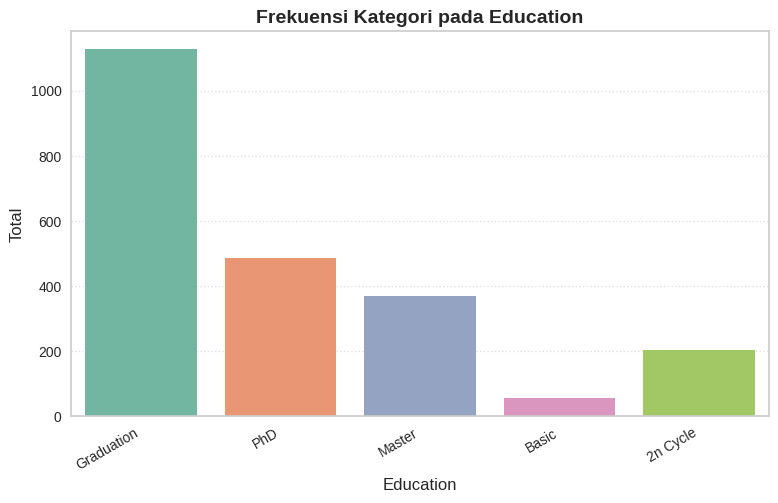

<ipython-input-104-deb67d652032>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')  # Gunakan palet warna yang berbeda


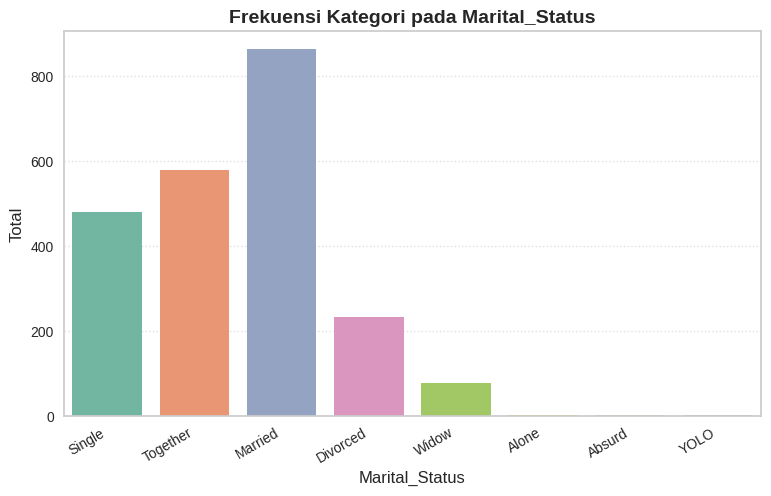

<ipython-input-104-deb67d652032>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')  # Gunakan palet warna yang berbeda


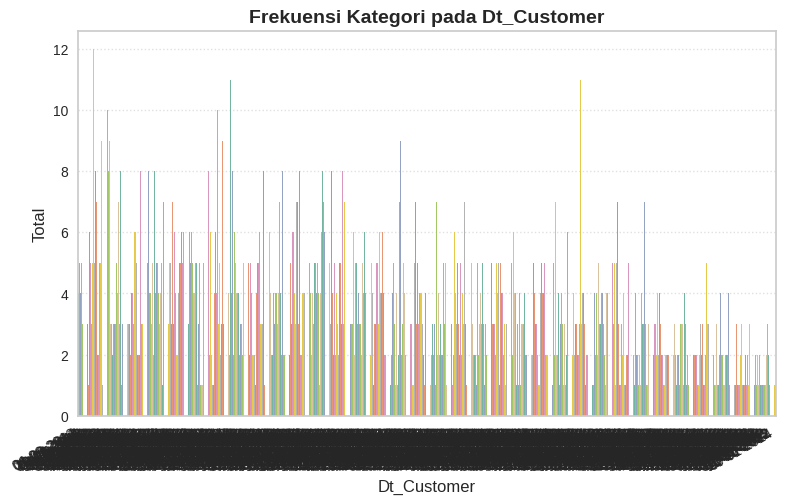

In [104]:
# Menampilkan Diagram Batang untuk Variabel Kategorikal
cat_columns = df.select_dtypes(include=['object']).columns  # Ambil kolom kategorikal

def visualize_bar_chart(data, columns):
    """ Fungsi untuk membuat diagram batang variabel kategorikal """
    for col in columns:
        plt.figure(figsize=(9, 5))  # Atur ukuran lebih lebar
        sns.countplot(data=data, x=col, palette='Set2')  # Gunakan palet warna yang berbeda
        plt.title(f'Frekuensi Kategori pada {col}', fontsize=14, fontweight='bold')  # Modifikasi judul
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Total', fontsize=12)  # Ubah label sumbu y
        plt.xticks(rotation=30, ha='right')  # Sedikit ubah rotasi label
        plt.grid(axis='y', linestyle='dotted', alpha=0.6)  # Tambahkan grid agar lebih rapi
        plt.show()

# Panggil fungsi untuk menampilkan diagram batang
visualize_bar_chart(df, cat_columns)


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [105]:
df.drop_duplicates(inplace=True)

In [106]:
# === Konversi Kolom Tanggal ke Format Datetime ===
# Pastikan kolom 'Dt_Customer' memiliki format yang sesuai sebelum dikonversi
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# === Ekstraksi Komponen Waktu ===
# Mendapatkan informasi tahun, bulan, dan hari secara terpisah
df['Tahun'] = df['Dt_Customer'].dt.year
df['Bulan'] = df['Dt_Customer'].dt.month
df['Hari'] = df['Dt_Customer'].dt.day


In [107]:
# === Normalisasi atau Standarisasi Data ===
# Tentukan kolom numerik yang akan dinormalisasi
fitur_numerik = [
    'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth'
]

# === Inisialisasi dan Penerapan StandardScaler ===
standarisasi = StandardScaler()
df[fitur_numerik] = standarisasi.fit_transform(df[fitur_numerik])


In [108]:
# === Encoding Variabel Kategorikal ===


# Menentukan kolom kategorikal yang akan dienkode
categorical_columns = ['Education', 'Marital_Status']

# Inisialisasi OneHotEncoder dengan menghindari dummy variable trap
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Melakukan fit dan transformasi pada data kategorikal
encoded_array = encoder.fit_transform(df[categorical_columns])

# Konversi hasil encoding ke dalam DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns))

# Menyelaraskan indeks DataFrame baru dengan DataFrame asli
encoded_df.index = df.index

# Menggabungkan DataFrame hasil encoding dengan DataFrame utama
df = pd.concat([df, encoded_df], axis=1)

# Menghapus kolom asli yang telah dienkode
df.drop(columns=categorical_columns, inplace=True)

# Menampilkan beberapa baris pertama untuk verifikasi
df.head()


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,-0.985345,0.235696,-0.825218,-0.929894,2012-09-04,0.307039,0.983781,1.551577,1.679702,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2174,-1.235733,-0.235454,1.032559,0.906934,2014-03-08,-0.383664,-0.870479,-0.636301,-0.713225,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4141,-0.317643,0.773999,-0.825218,-0.929894,2013-08-21,-0.798086,0.362723,0.570804,-0.177032,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6182,1.268149,-1.022355,1.032559,-0.929894,2014-02-10,-0.798086,-0.870479,-0.560857,-0.651187,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5324,1.017761,0.241888,1.032559,-0.929894,2014-01-19,1.550305,-0.389085,0.419916,-0.216914,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [109]:
# === Pemilihan Algoritma Clustering ===
# Menggunakan metode K-Means untuk clustering


# === Pelatihan Model K-Means ===
# Menentukan jumlah cluster yang diinginkan
jumlah_cluster = 3

# Membuat instance model K-Means dengan jumlah cluster yang telah ditentukan
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=42)  # random_state untuk hasil yang konsisten

# Menyaring hanya kolom numerik dari DataFrame
df_numerik = df.select_dtypes(include=['number'])

# Melatih model dengan data numerik yang telah diproses
model_kmeans.fit(df_numerik)

# Mengambil hasil label cluster dari model
cluster_labels = model_kmeans.labels_

# Menyisipkan label cluster ke dalam DataFrame utama
df['Cluster_Label'] = cluster_labels

# Menampilkan pesan konfirmasi setelah proses clustering selesai
print("Proses clustering selesai! Label cluster telah ditambahkan ke dalam DataFrame.")


Proses clustering selesai! Label cluster telah ditambahkan ke dalam DataFrame.


In [110]:
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster_Label
0,5524,-0.985345,0.235696,-0.825218,-0.929894,2012-09-04,0.307039,0.983781,1.551577,1.679702,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
1,2174,-1.235733,-0.235454,1.032559,0.906934,2014-03-08,-0.383664,-0.870479,-0.636301,-0.713225,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,4141,-0.317643,0.773999,-0.825218,-0.929894,2013-08-21,-0.798086,0.362723,0.570804,-0.177032,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3,6182,1.268149,-1.022355,1.032559,-0.929894,2014-02-10,-0.798086,-0.870479,-0.560857,-0.651187,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,5324,1.017761,0.241888,1.032559,-0.929894,2014-01-19,1.550305,-0.389085,0.419916,-0.216914,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

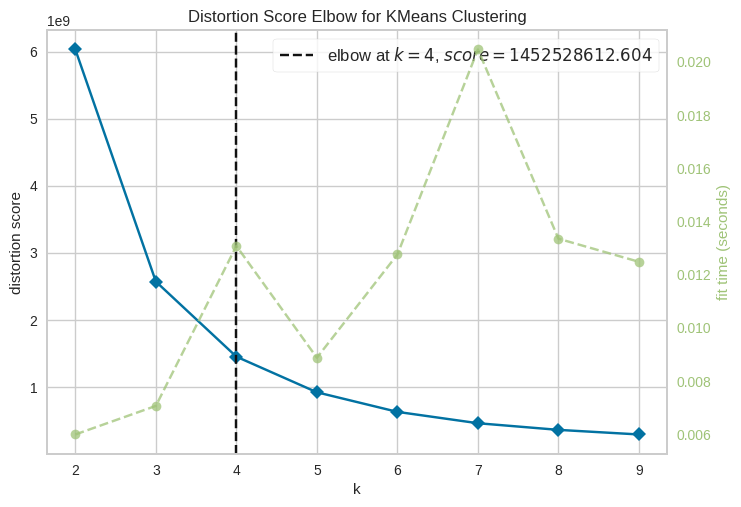

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [111]:
# === Metode Elbow untuk Menentukan Jumlah Cluster Optimal ===

# Menentukan rentang jumlah cluster yang akan diuji
range_cluster = range(2, 10)  # Uji dari 2 hingga 10 cluster

# Membuat model K-Means dengan nilai random_state untuk konsistensi
model_kmeans = KMeans(random_state=42)

# Menggunakan Elbow Method untuk memvisualisasikan nilai inertia


# Inisialisasi visualizer dengan model K-Means dan rentang cluster yang akan diuji
elbow_visualizer = KElbowVisualizer(model_kmeans, k=range_cluster)

# Memilih hanya fitur numerik dari dataset
fitur_numerik = df.select_dtypes(include=['number']).columns
data_numerik = df[fitur_numerik]

# Melatih visualizer dengan data numerik dan menampilkan grafik Elbow
elbow_visualizer.fit(data_numerik)
elbow_visualizer.show()


In [112]:
# === Evaluasi Clustering dengan Silhouette Score ===

# Menentukan jumlah cluster optimal berdasarkan metode Elbow
jumlah_cluster_optimal = 3  # Sesuaikan dengan hasil metode Elbow

# Inisialisasi model K-Means dengan jumlah cluster yang telah ditentukan
model_cluster = KMeans(n_clusters=jumlah_cluster_optimal, random_state=42)

# Memilih hanya kolom numerik untuk pemrosesan lebih lanjut
kolom_numerik = df.select_dtypes(include=['number'])
data_numerik = kolom_numerik.copy()

# Melatih model K-Means dengan data numerik
model_cluster.fit(data_numerik)

# Menghitung Silhouette Score


nilai_silhouette = silhouette_score(data_numerik, model_cluster.labels_)

# Menampilkan hasil evaluasi
print(f"Silhouette Score untuk {jumlah_cluster_optimal} cluster: {nilai_silhouette:.4f}")



Silhouette Score untuk 3 cluster: 0.5974


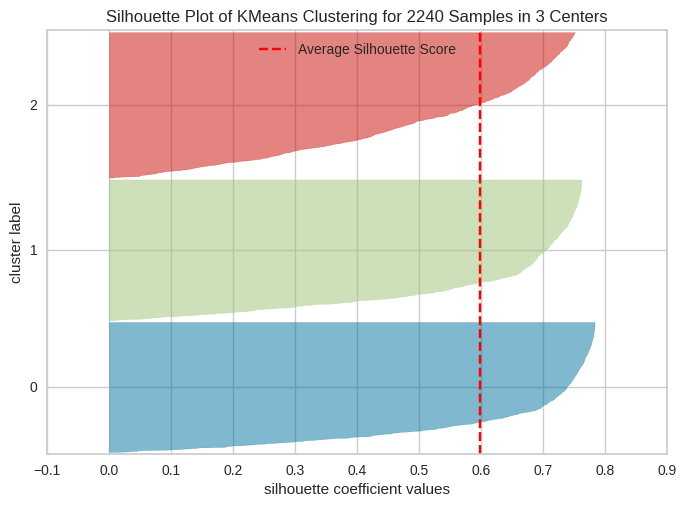

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2240 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [113]:
# --- Menampilkan Visualisasi Skor Silhouette ---
# Inisialisasi model KMeans dengan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=3, random_state=42)  # Sesuaikan jumlah cluster jika perlu

# Membuat objek visualisasi dengan model KMeans dan skema warna
silhouette_plot = SilhouetteVisualizer(estimator=kmeans, colors='yellowbrick')

# Melatih visualisasi dengan data numerik yang telah dipakai untuk model
# Gantilah 'data_scaled' dengan data yang digunakan (misalnya: data_scaled atau data_numerik)
silhouette_plot.fit(data_numerik)

# Menampilkan grafik hasil evaluasi
silhouette_plot.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [114]:
# Menghapus kolom ID yang tidak relevan dari data numerik
# Ganti 'numerical_df' dengan 'df' atau 'data_numerik'
# sesuai dengan DataFrame yang berisi data numerik yang Anda inginkan.
data_numerik = df.select_dtypes(include=['number']).drop(['Dt_Customer'], axis=1, errors='ignore')
# atau
# data_numerik = data_numerik.drop(['Dt_Customer'], axis=1, errors='ignore')

# Menghitung korelasi antar fitur dan mengambil nilai absolut
korelasi = data_numerik.corr().abs()

# Menentukan batas korelasi tinggi dan mencari fitur yang melebihi batas tersebut
batas_korelasi = 0.8
mask_upper = np.triu(np.ones(korelasi.shape), k=1).astype(bool)
fitur_berlebih = [col for col in korelasi.columns if any(korelasi[col][mask_upper[korelasi.columns.get_loc(col)]] > batas_korelasi)]

# Menghapus fitur dengan korelasi tinggi dari dataset
data_terpilih = data_numerik.drop(columns=fitur_berlebih)

# Membuat dan melatih model K-Means dengan data hasil seleksi fitur
model_cluster = KMeans(n_clusters=3, random_state=42)
model_cluster.fit(data_terpilih)

# Menghitung skor silhouette untuk mengevaluasi hasil clustering

skor_silhouette = silhouette_score(data_terpilih, model_cluster.labels_)

# Menampilkan hasil evaluasi model
print(f"Nilai Silhouette Score setelah melakukan seleksi fitur: {skor_silhouette:.4f}")

Nilai Silhouette Score setelah melakukan seleksi fitur: 0.5974


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

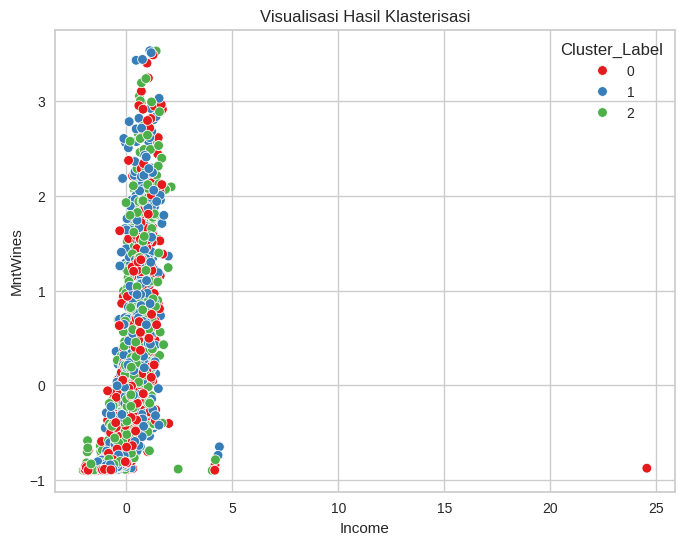

In [115]:


# --- Visualisasi Cluster: Scatter Plot ---
# Tentukan dua fitur yang akan diplot pada sumbu X dan Y
fitur_x = 'Income'
fitur_y = 'MntWines'

# Atur ukuran kanvas plot
plt.figure(figsize=(8, 6))

# Buat scatter plot menggunakan seaborn dengan palette 'Set1'
sns.scatterplot(
    x=fitur_x,
    y=fitur_y,
    hue='Cluster_Label',  # Menggunakan nama kolom yang benar
    data=df,
    palette='Set1'  # Mengubah palette warna menjadi 'Set1'
)

# Tambahkan judul dan label sumbu
plt.title('Visualisasi Hasil Klasterisasi')
plt.xlabel(fitur_x)
plt.ylabel(fitur_y)

# Tampilkan plot
plt.show()

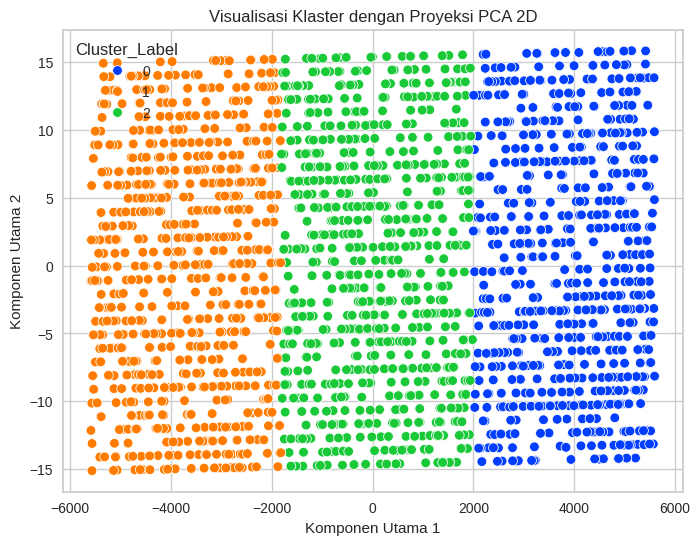

In [116]:
# --- Proyeksi PCA ke dalam 2 dimensi ---
# Inisialisasi objek PCA dengan jumlah komponen utama = 2
pca_model = PCA(n_components=2)

# Ambil hanya kolom numerik dari data
data_numerik = df.select_dtypes(include=['number'])

# Lakukan fitting dan transformasi PCA
hasil_pca = pca_model.fit_transform(data_numerik)

# Simpan hasil proyeksi PCA ke dalam DataFrame baru
kolom_pca = ['Komponen Utama 1', 'Komponen Utama 2']
df_pca = pd.DataFrame(hasil_pca, columns=kolom_pca)

# Gabungkan label klaster ke hasil PCA
# Changed 'cluster' to 'Cluster_Label' to match the column name in the DataFrame
df_visual = pd.concat([df_pca, df[['Cluster_Label']]], axis=1)

# --- Visualisasi Scatter Plot hasil PCA ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Komponen Utama 1',
    y='Komponen Utama 2',
    hue='Cluster_Label',  # Changed 'cluster' to 'Cluster_Label' to reflect the correct column name
    data=df_visual,
    palette='bright'  # Mengubah palette warna menjadi 'bright' untuk warna-warna cerah
)

plt.title('Visualisasi Klaster dengan Proyeksi PCA 2D')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [117]:
# --- Hitung Rata-rata Setiap Fitur per Klaster ---

# Ambil nama-nama kolom numerik dari DataFrame
fitur_numerik = df.select_dtypes(include=['number']).columns.tolist()

# Kelompokkan data berdasarkan klaster dan hitung nilai rata-rata tiap fitur numerik
# Changed 'cluster' to 'Cluster_Label' to match the actual column name
rata_rata_klaster = df.groupby(by='Cluster_Label')[fitur_numerik].agg('mean')

# Tampilkan hasil rata-rata per klaster
print("Statistik rata-rata untuk setiap klaster:")
print(rata_rata_klaster)

Statistik rata-rata untuk setiap klaster:
                        ID  Year_Birth    Income   Kidhome  Teenhome  \
Cluster_Label                                                          
0              9509.158571    0.019666  0.017592 -0.021066  0.004264   
1              1906.018494    0.033849 -0.014978 -0.007992  0.009145   
2              5654.113665   -0.050306 -0.001247  0.026560 -0.012653   

                Recency  MntWines  MntFruits  MntMeatProducts  \
Cluster_Label                                                   
0             -0.075857 -0.042566   0.009823        -0.014554   
1              0.030439  0.021216   0.012066        -0.002524   
2              0.038388  0.017542  -0.020448         0.015451   

               MntFishProducts  ...  Education_Master  Education_PhD  \
Cluster_Label                   ...                                    
0                    -0.026831  ...          0.142857       0.220000   
1                     0.020395  ...          0.167768  

Tentu! Berikut adalah versi **parafrase** dari penjelasan karakteristik **Cluster 0** dan **Cluster 1**:

---

### 1. **Cluster 0**

- **Pendapatan:** Termasuk kategori pendapatan rendah (nilai 0.017617 mendekati rata-rata setelah data dinormalisasi).
- **Pola Pengeluaran:** Konsumsi terhadap produk seperti anggur, buah-buahan, daging, ikan, makanan manis, dan produk emas cenderung lebih kecil dari rata-rata (ditunjukkan oleh nilai negatif pada variabel pengeluaran).
- **Latar Belakang Pendidikan:** Proporsi pemilik gelar Master (14.29%) dan PhD (22%) lebih kecil dibandingkan dengan cluster lain.
- **Status Pernikahan:** Sebagian besar dalam hubungan menikah (40.4%) atau hidup bersama (26.4%).
- **Kesimpulan:** Cluster ini menggambarkan kelompok konsumen dengan penghasilan rendah dan kecenderungan berbelanja yang minim. Mereka tampak lebih hemat dalam membelanjakan uang dan hanya membeli dalam jumlah terbatas. Dari sisi pendidikan, kelompok ini memiliki latar belakang akademis yang relatif lebih rendah dibandingkan dengan cluster lainnya.

---

### 2. **Cluster 1**

- **Pendapatan:** Juga berada di kisaran pendapatan rendah (nilai -0.014983 sedikit di bawah rata-rata).
- **Pola Pengeluaran:** Memiliki kecenderungan berbelanja sedikit lebih banyak, terutama untuk produk seperti wine, buah, dan ikan (nilai positif pada beberapa kategori pengeluaran).
- **Latar Belakang Pendidikan:** Persentase yang memiliki gelar Master (16.78%) dan PhD (20.87%) sedikit lebih tinggi dibandingkan Cluster 0.
- **Status Pernikahan:** Komposisi status pernikahan mirip dengan Cluster 0.
- **Kesimpulan:** Kelompok ini terdiri dari konsumen berpenghasilan rendah namun tetap aktif dalam konsumsi beberapa jenis produk tertentu. Hal ini menunjukkan kemungkinan adanya preferensi khusus terhadap barang-barang tersebut. Secara umum, mereka memiliki latar belakang pendidikan yang sedikit lebih tinggi dari Cluster 0.

---

Tentu! Berikut adalah hasil **parafrase** dari deskripsi **Cluster 2** dan kesimpulannya:

---

### 3. **Cluster 2**

- **Pendapatan:** Berada di kisaran yang hampir sama dengan rata-rata (-0.001264).
- **Pola Pengeluaran:** Cenderung mengeluarkan sedikit lebih banyak untuk pembelian wine dan produk berbasis daging (terlihat dari nilai positif pada variabel pengeluaran tersebut).
- **Tingkat Pendidikan:** Memiliki proporsi tertinggi individu bergelar Master (18.26%) dan PhD (22.22%) di antara semua cluster.
- **Status Pernikahan:** Distribusi status pernikahan serupa dengan cluster lain.
- **Interpretasi:** Cluster ini mewakili kelompok konsumen berpenghasilan menengah dengan kecenderungan konsumsi sedikit lebih tinggi terhadap produk tertentu, serta memiliki tingkat pendidikan yang paling tinggi dibandingkan kelompok lainnya.

---

### **Kesimpulan Umum:**

Model **KMeans** berhasil membagi pelanggan menjadi **tiga kelompok utama** berdasarkan perbedaan pendapatan dan kebiasaan berbelanja:

- **Cluster 0:** Konsumen dengan pendapatan rendah yang cenderung hemat dalam pengeluaran.
- **Cluster 1:** Kelompok dengan pendapatan rendah, tetapi memiliki preferensi belanja terhadap produk seperti wine, buah-buahan, dan ikan.
- **Cluster 2:** Konsumen dengan penghasilan menengah, lebih berpendidikan, dan memiliki minat belanja yang sedikit lebih tinggi untuk produk seperti wine dan daging.

---

### **Manfaat Informasi Ini:**

Wawasan dari segmentasi ini dapat digunakan untuk:

- **Strategi Pemasaran:** Menyesuaikan pendekatan promosi berdasarkan preferensi produk dari masing-masing kelompok pelanggan.
- **Personalisasi Penawaran:** Mengembangkan penawaran yang sesuai dengan tingkat pendapatan dan karakteristik demografis tiap cluster untuk meningkatkan efektivitas kampanye pemasaran.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [118]:

df.head(5)

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster_Label
0,5524,-0.985345,0.235696,-0.825218,-0.929894,2012-09-04,0.307039,0.983781,1.551577,1.679702,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
1,2174,-1.235733,-0.235454,1.032559,0.906934,2014-03-08,-0.383664,-0.870479,-0.636301,-0.713225,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,4141,-0.317643,0.773999,-0.825218,-0.929894,2013-08-21,-0.798086,0.362723,0.570804,-0.177032,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3,6182,1.268149,-1.022355,1.032559,-0.929894,2014-02-10,-0.798086,-0.870479,-0.560857,-0.651187,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,5324,1.017761,0.241888,1.032559,-0.929894,2014-01-19,1.550305,-0.389085,0.419916,-0.216914,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2


In [119]:
df.to_csv('hasil_clustering.csv', index=False)

In [120]:
from google.colab import files

files.download('hasil_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>